# Model 1: Linear Regression

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from datetime import datetime, timedelta,date
import seaborn as sns
from sklearn.metrics import mean_squared_error
#importing machine learning libraries
import pickle



plt.style.use('ggplot') # plots style
random_state = 1

### sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
### test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
### sample_submission.csv - a sample submission file in the correct format.
### items.csv - supplemental information about the items/products.
### item_categories.csv  - supplemental information about the items categories.
### shops.csv- supplemental information about the shops.

In [64]:
items = pd.read_csv('input/items.csv')
shops = pd.read_csv('input/shops.csv')
item_categories = pd.read_csv('input/item_categories.csv')
sales_train = pd.read_csv('input/sales_train.csv')
sample_submission = pd.read_csv('input/sample_submission.csv')
# set index to ID to avoid droping it later
test  = pd.read_csv('input/test.csv').set_index('ID')

*Data fields*

ID - an Id that represents a (Shop, Item) tuple within the test set

shop_id - unique identifier of a shop

item_id - unique identifier of a product

item_category_id - unique identifier of item category

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

item_price - current price of an item

date - date in format dd/mm/yyyy

date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

item_name - name of item

shop_name - name of shop

item_category_name - name of item category

In [65]:
new_data = sales_train.pivot_table(index = ['shop_id', 'item_id'], values = ['item_cnt_day'], columns=['date_block_num'])

In [66]:
new_data

item_cnt_day                                              ...  \
date_block_num            0         1   2   3   4   5    6   7   8    9   ...   
shop_id item_id                                                           ...   
0       30               NaN  3.444444 NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        31               NaN  1.571429 NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        32               1.5  1.428571 NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        33               1.0  1.000000 NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        35               1.0  1.272727 NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
...                      ...       ...  ..  ..  ..  ..  ...  ..  ..  ...  ...   
59      22154            1.0       NaN NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        22155            NaN       NaN NaN NaN NaN NaN  1.0 NaN NaN  NaN  ...   
        22162            NaN       NaN NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        22164            NaN       NaN NaN NaN NaN NaN  NaN NaN NaN  NaN  ...   
        22167            NaN       NaN NaN NaN NaN NaN  NaN NaN NaN  1.0  ...   

                                                               
date_block_num   24   25   26   27   28  29   30   31  32  33  
shop_id item_id                                                
0       30      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        31      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        32      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        33      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        35      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
...              ..  ...  ...  ...  ...  ..  ...  ...  ..  ..  
59      22154   NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        22155   NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        22162   NaN  1.0  1.0  1.0  1.0 NaN  NaN  1.0 NaN NaN  
        22164   NaN  1.0  1.0  1.0  NaN NaN  1.0  NaN NaN NaN  
        22167   NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  

[424124 rows x 34 columns]

In [67]:
new_data.reset_index(inplace=True)

In [68]:
new_data.columns

MultiIndex([(     'shop_id', ''),
            (     'item_id', ''),
            ('item_cnt_day',  0),
            ('item_cnt_day',  1),
            ('item_cnt_day',  2),
            ('item_cnt_day',  3),
            ('item_cnt_day',  4),
            ('item_cnt_day',  5),
            ('item_cnt_day',  6),
            ('item_cnt_day',  7),
            ('item_cnt_day',  8),
            ('item_cnt_day',  9),
            ('item_cnt_day', 10),
            ('item_cnt_day', 11),
            ('item_cnt_day', 12),
            ('item_cnt_day', 13),
            ('item_cnt_day', 14),
            ('item_cnt_day', 15),
            ('item_cnt_day', 16),
            ('item_cnt_day', 17),
            ('item_cnt_day', 18),
            ('item_cnt_day', 19),
            ('item_cnt_day', 20),
            ('item_cnt_day', 21),
            ('item_cnt_day', 22),
            ('item_cnt_day', 23),
            ('item_cnt_day', 24),
            ('item_cnt_day', 25),
            ('item_cnt_day', 26),
            ('

In [69]:
dataset = pd.merge(test, new_data, on=['item_id', 'shop_id'], how = 'left')

C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [70]:
dataset

,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,5,5037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN
1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,1.0,NaN,1.0,1.0,1.0
3,5,5232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
214196,45,16188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,45,15757,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214198,45,19648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
dataset.fillna(0, inplace=True)

In [72]:
dataset

,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
dataset.shape

(214200, 36)

In [74]:
dataset.to_csv('input/saved.csv', index=False)

In [75]:
dataset.head()

,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
dataset2 = pd.read_csv('input/saved.csv')

In [93]:
dataset2

,shop_id,item_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
dataset2.columns

Index(['shop_id', 'item_id', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6',
       'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15',
       'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24',
       'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33'],
      dtype='object')

In [95]:
dataset3 = dataset2.drop(['shop_id', 'item_id'],axis=1)

In [96]:
dataset3.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
dataset3.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18',
       'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27',
       'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33'],
      dtype='object')

In [98]:
X_train = dataset3[['f_0','f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18',
       'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27',
       'f_28', 'f_29', 'f_30', 'f_31', 'f_32']]

In [99]:
y_train = dataset3[['f_33']]

In [100]:
X_test = dataset3[['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18',
       'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27',
       'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33']]

In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [102]:
predictions = lm.predict(X_test)

In [103]:
predictions.shape

(214200, 1)

In [104]:
submission = pd.DataFrame(data=predictions,columns=['item_cnt_month'])

In [105]:
submission.reset_index(inplace=True)

In [106]:
submission.

,index,item_cnt_month
0,0,0.336354
1,1,0.039954
2,2,0.543258
3,3,0.113717
4,4,0.039954
...,...,...
214195,214195,0.635555
214196,214196,0.039954
214197,214197,0.626086
214198,214198,0.039954


In [107]:
submission.rename(columns={"index":"ID"},inplace=True)

In [112]:
submission.to_csv('input/sub_1_LinearRegression.csv', index=False)

In [113]:
submission

,ID,item_cnt_month
0,0,0.336354
1,1,0.039954
2,2,0.543258
3,3,0.113717
4,4,0.039954
...,...,...
214195,214195,0.635555
214196,214196,0.039954
214197,214197,0.626086
214198,214198,0.039954


# Upto here Model  1

# Model 2: Light GBM

In [111]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

In [115]:
# evaluate the model
model = LGBMRegressor()
cv = cross_
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,X= X_train,y= y_train, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMRegressor()

model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_test)

MAE: -1.637 (1.972)


In [116]:
yhat.shape

(214200,)

In [117]:
yhat = pd.DataFrame(data=yhat,columns=['item_cnt_month'])
yhat.reset_index(inplace=True)
yhat.rename(columns={"index":"ID"},inplace=True)

In [120]:
yhat.to_csv('input/sub_2_lgbm.csv', index=False)

In [121]:
yhat

,ID,item_cnt_month
0,0,0.389819
1,1,0.062734
2,2,0.502243
3,3,0.136424
4,4,0.062734
...,...,...
214195,214195,0.248141
214196,214196,0.062734
214197,214197,0.114115
214198,214198,0.062734


# Model 3: LSTM

# Refer LSTM notebook

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)



StandardScaler()

In [170]:
scaled_data = scaler.transform(X_train)

In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA(n_components=2)

In [173]:
pca.shape

# np.isnan(scaled_data)

AttributeError: 'PCA' object has no attribute 'shape'

In [174]:
pca.fit(scaled_data)

PCA(n_components=2)

In [175]:
x_pca = pca.transform(scaled_data)

In [176]:
scaled_data.shape

(214200, 33)

In [177]:
x_pca.shape

(214200, 2)

# Model 4

In [178]:
dataset3.describe()

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,m_24,m_25,m_26,m_27,m_28,m_29,m_30,m_31,m_32,m_33
count,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,...,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.000000,214200.00000,214200.000000,214200.000000
mean,0.039069,0.041619,0.049858,0.043147,0.044153,0.049354,0.051533,0.055750,0.058779,0.058414,...,0.134613,0.122110,0.126252,0.115093,0.117810,0.119762,0.128546,0.14324,0.135539,0.145602
std,0.210394,0.226318,0.244533,0.246013,0.236280,0.350079,0.284657,0.375468,0.409814,0.291794,...,2.201439,0.374084,0.424844,0.432225,0.438747,0.359014,0.356116,0.38926,0.418213,1.180798
min,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,11.000000,16.714286,12.950000,50.000000,24.375000,92.600000,29.666667,115.000000,47.714286,31.548387,...,1000.000000,18.000000,78.000000,62.538462,61.111111,14.800000,15.548387,25.50000,36.500000,500.000000


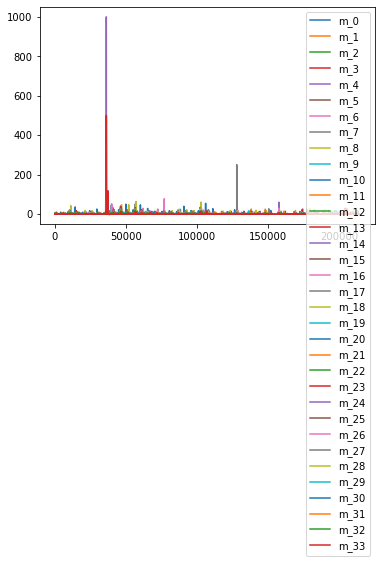

In [181]:
dataset3.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAA10F6408>,
      dtype=object)

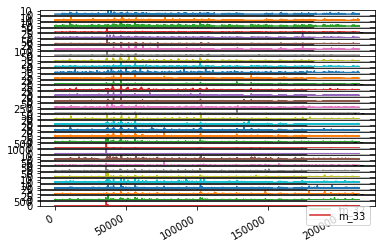

In [193]:
# plt.figure(figsize=(14,10))

dataset3.plot(subplots=True)

C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

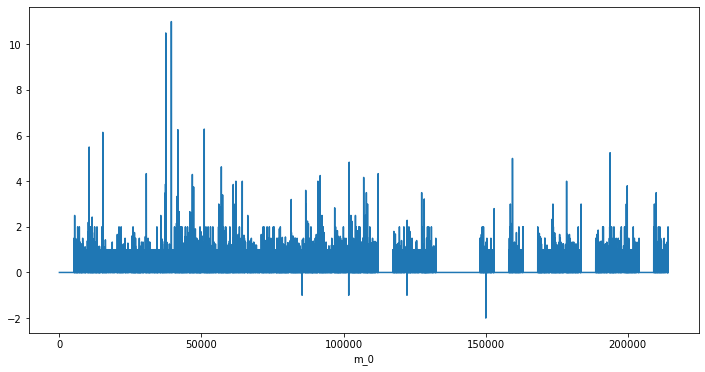

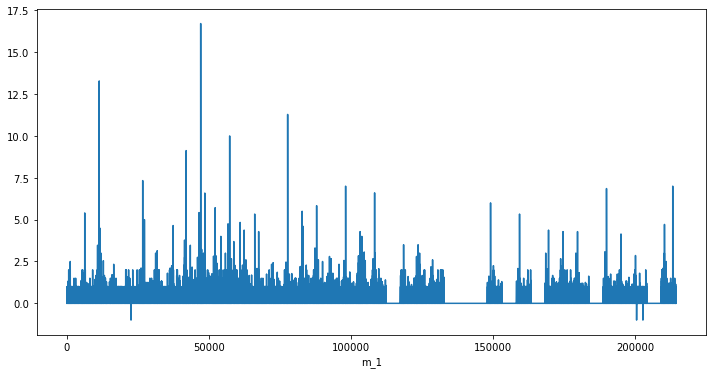

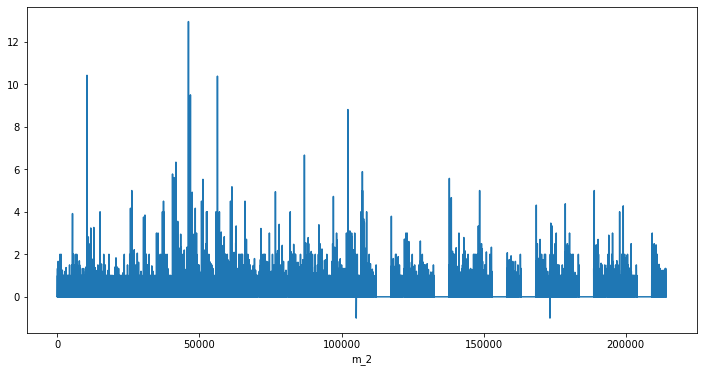

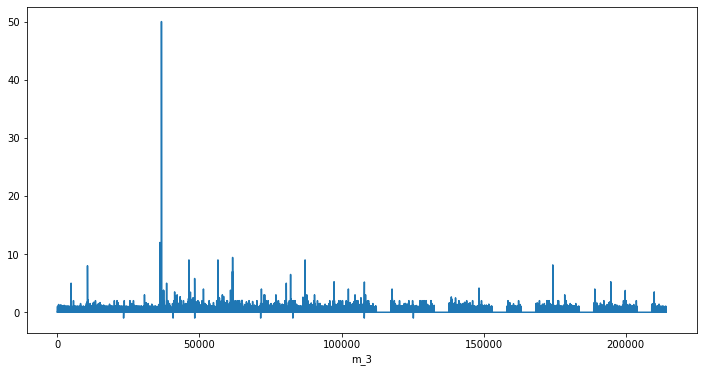

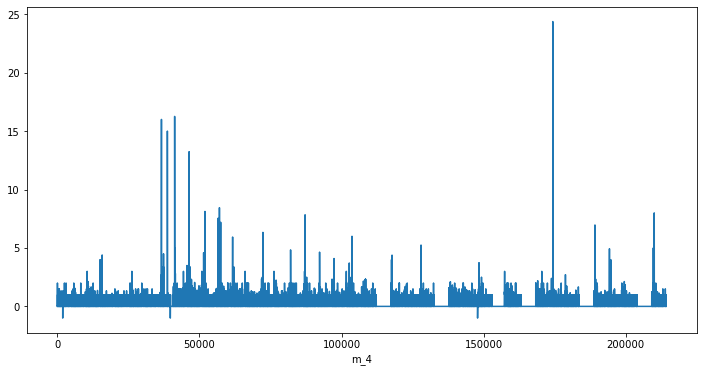

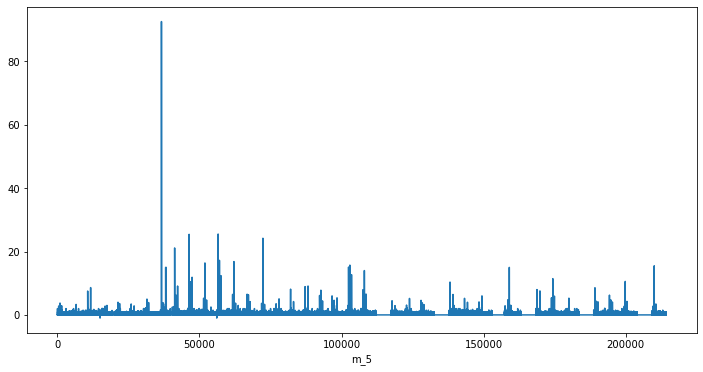

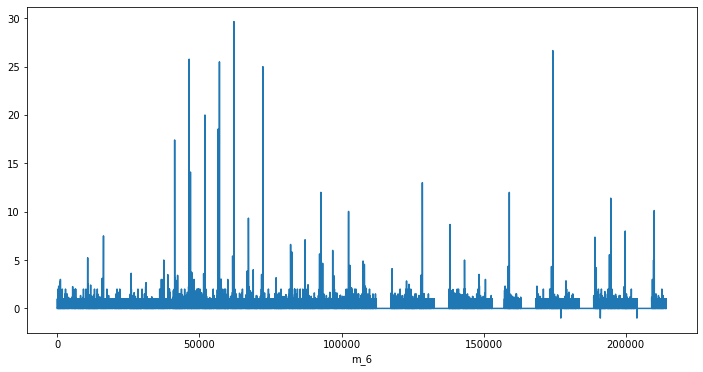

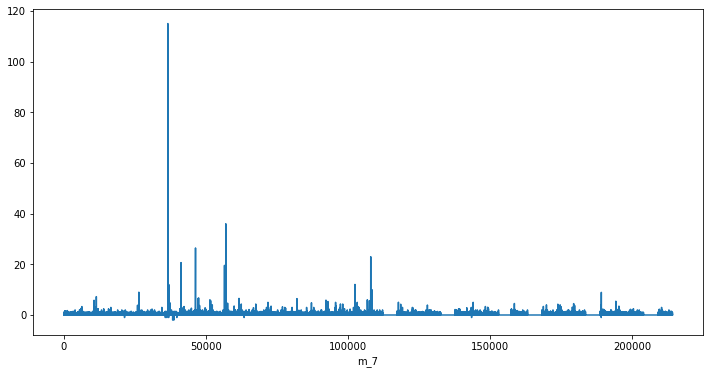

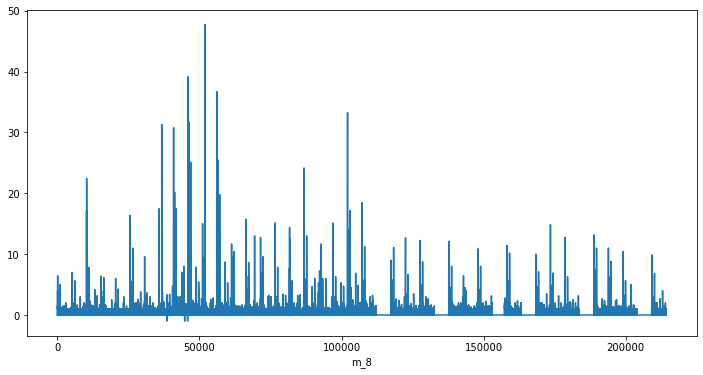

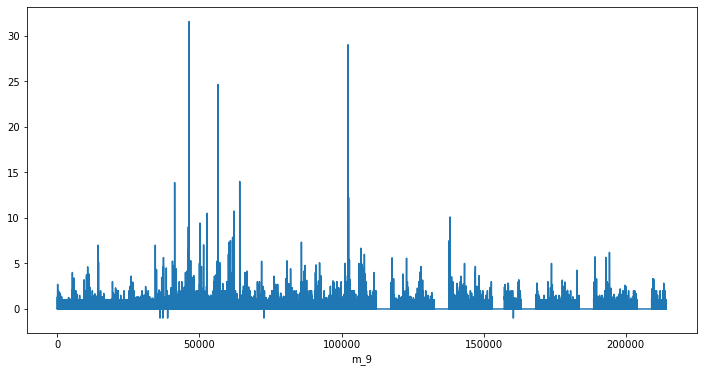

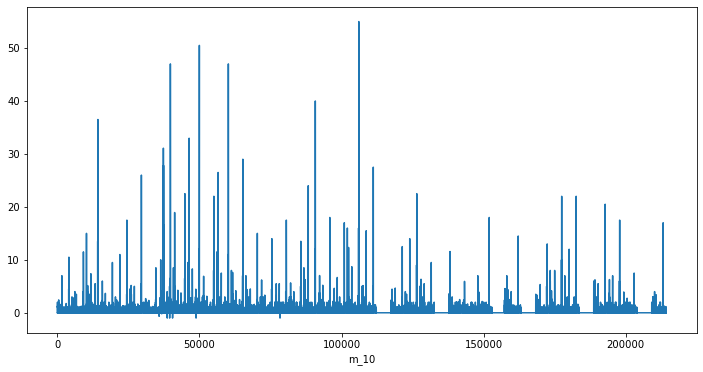

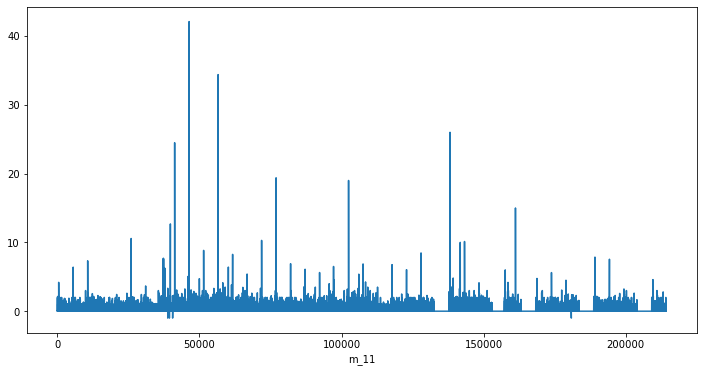

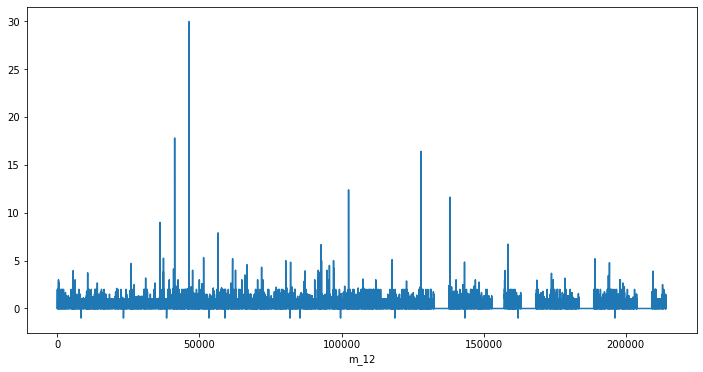

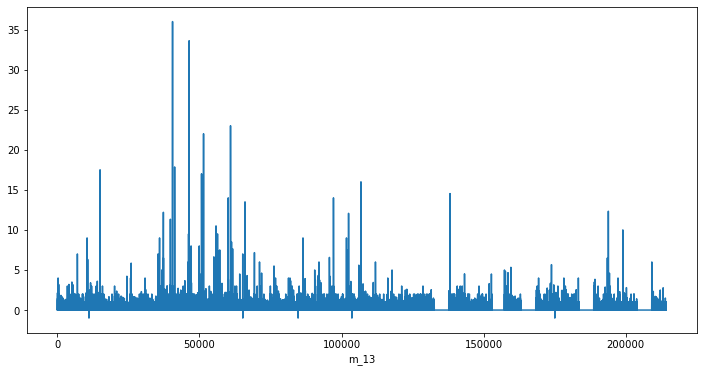

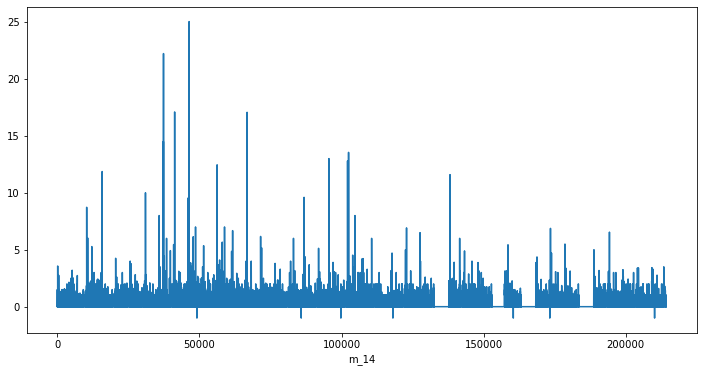

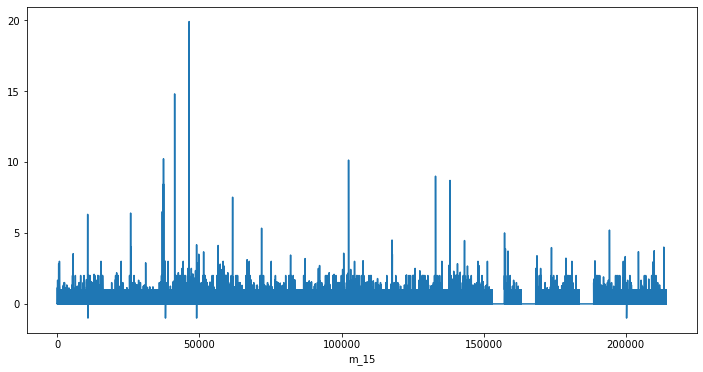

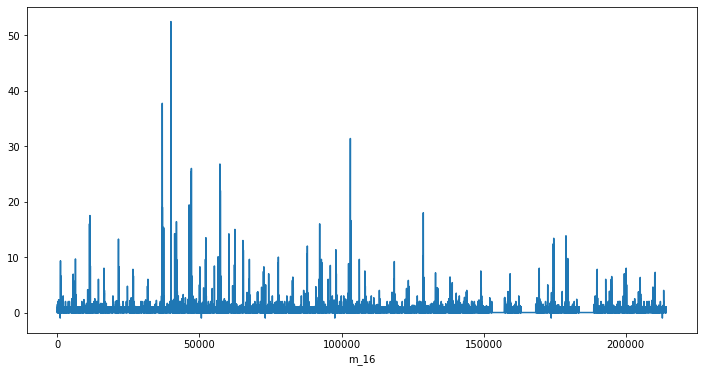

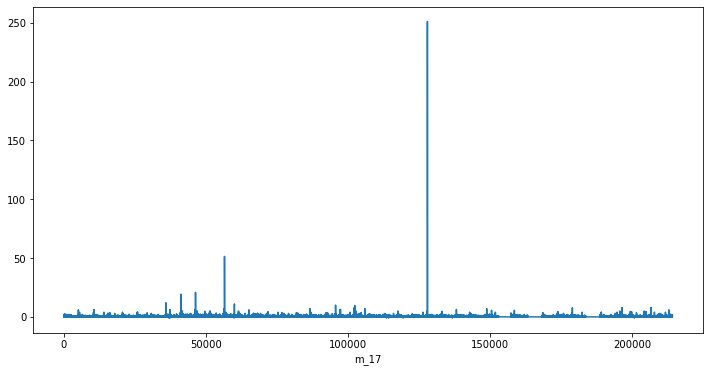

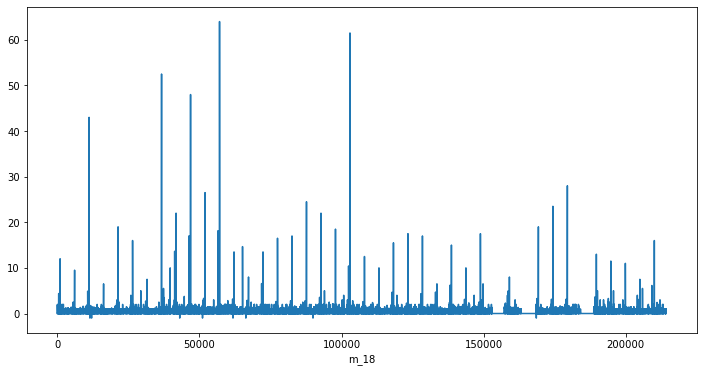

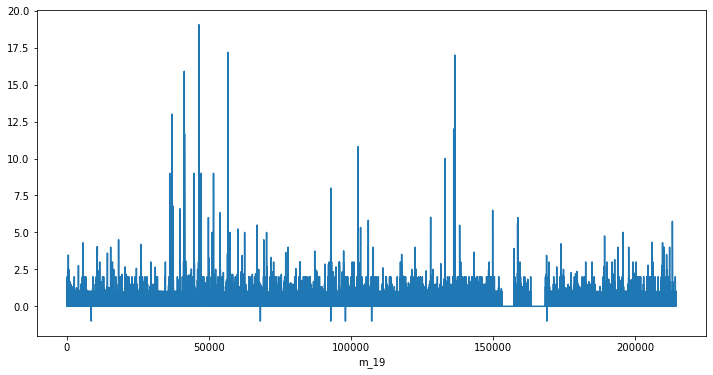

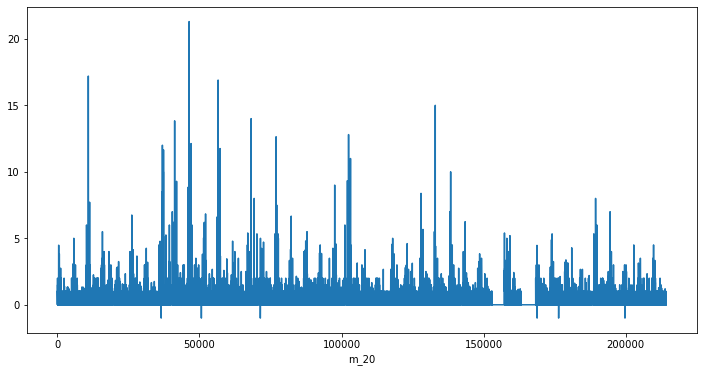

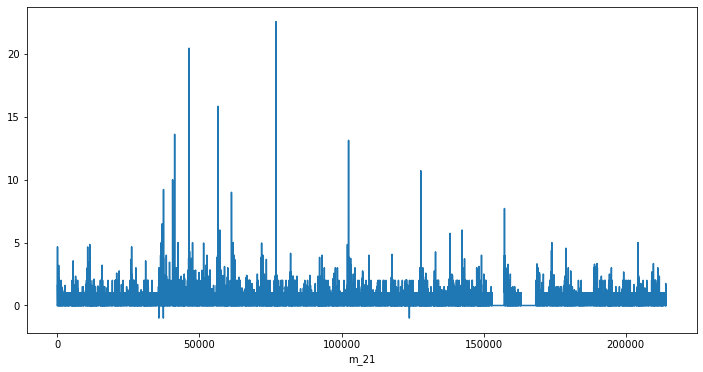

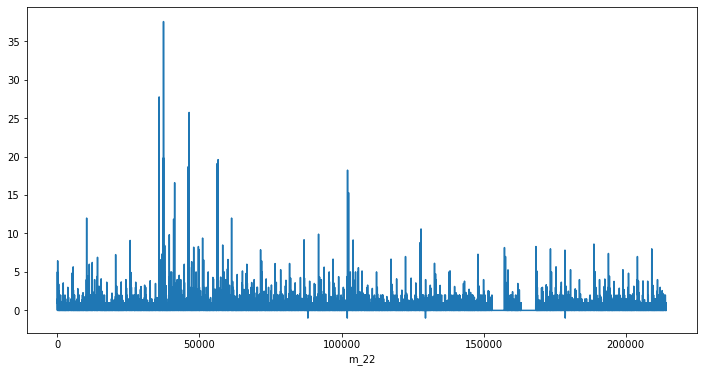

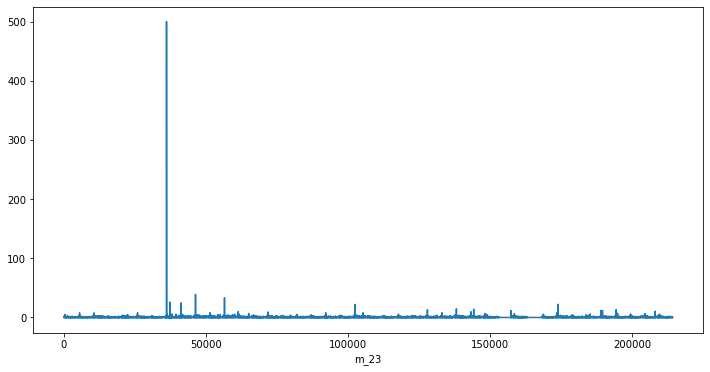

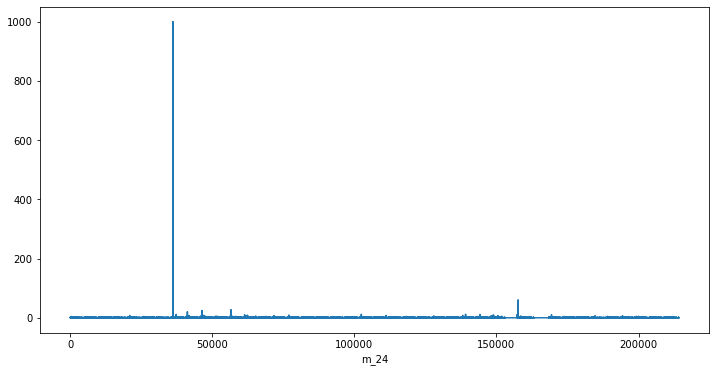

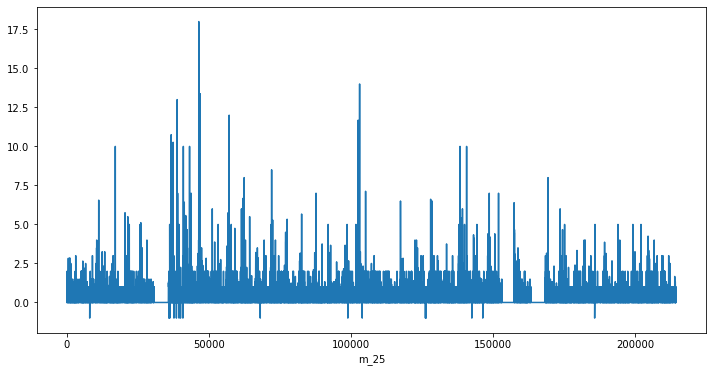

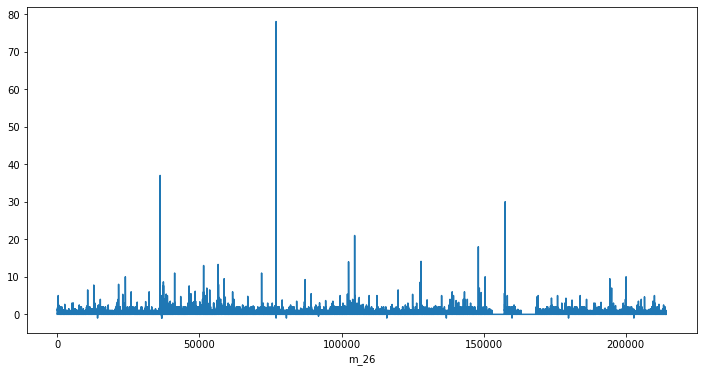

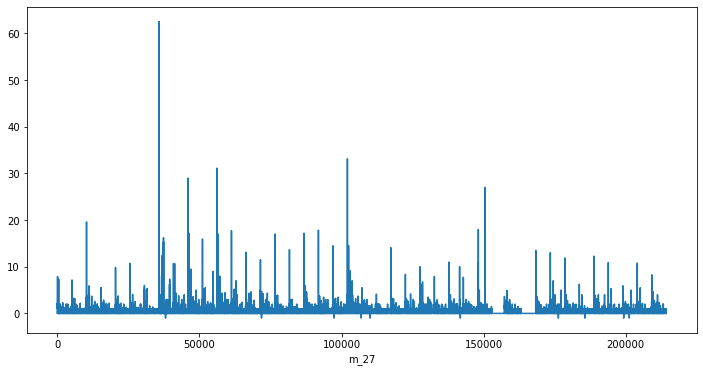

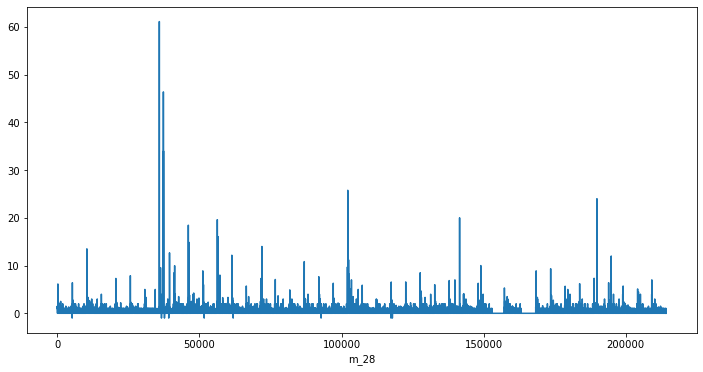

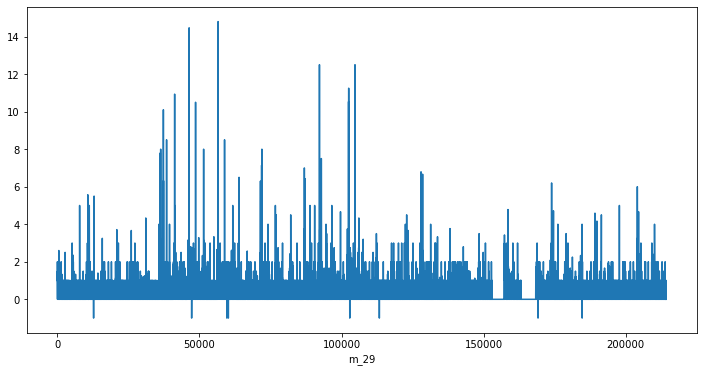

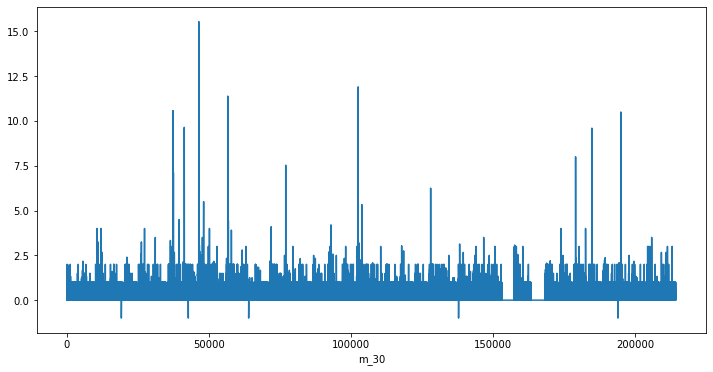

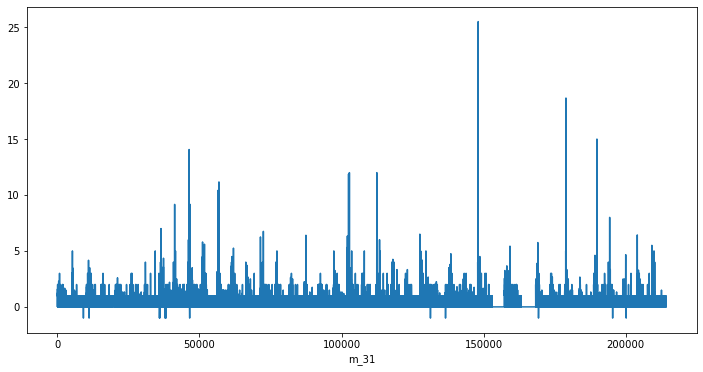

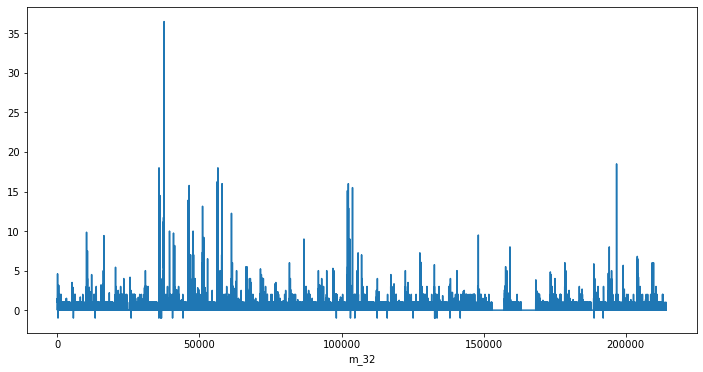

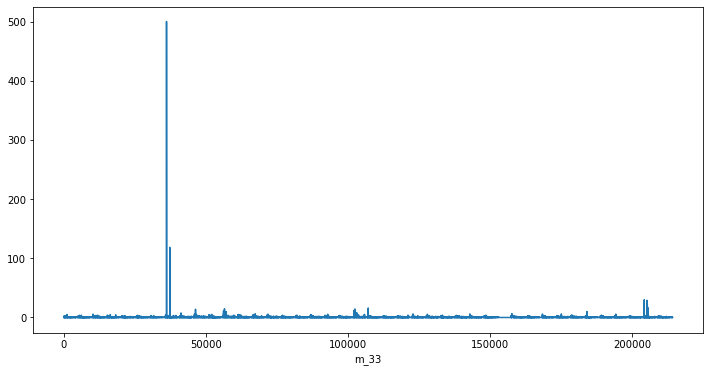

In [205]:
for i in dataset3.columns:
    plt.figure(figsize=(12,6))
#     plt.label()
    dataset3[str(i)].plot()
    plt.xlabel(str(i))
    

In [207]:
dataset4 = dataset3.rolling(window=20).mean()

In [212]:
dataset5 = dataset4.fillna(0)

C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

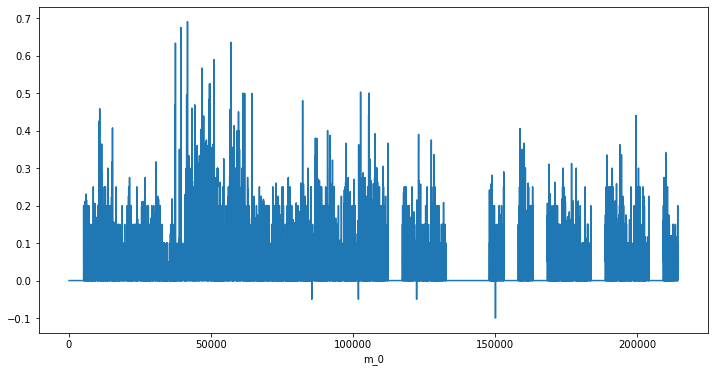

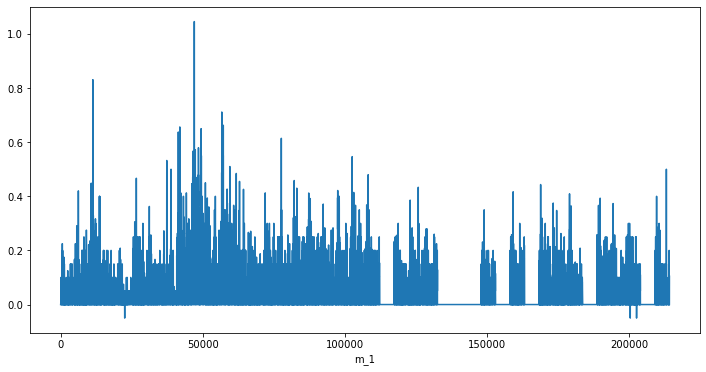

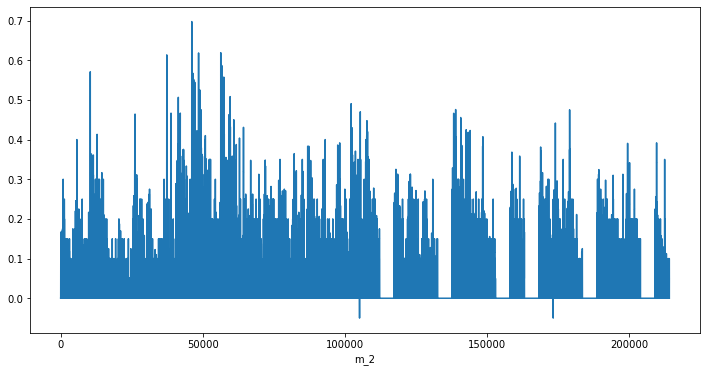

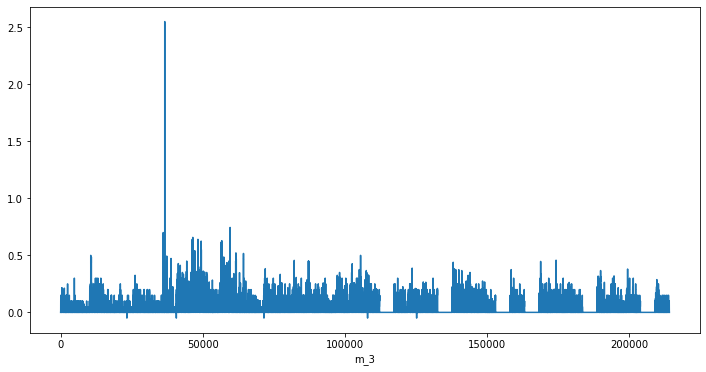

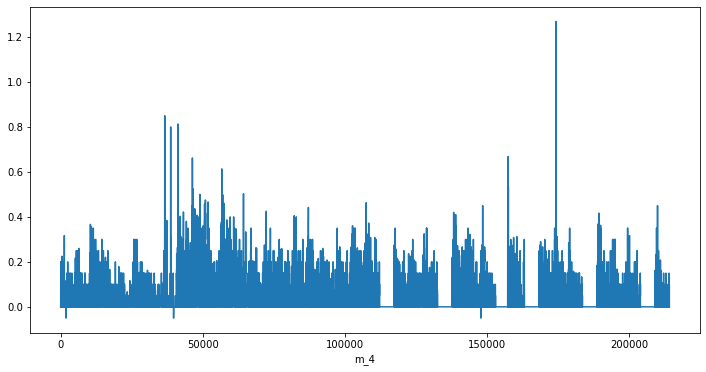

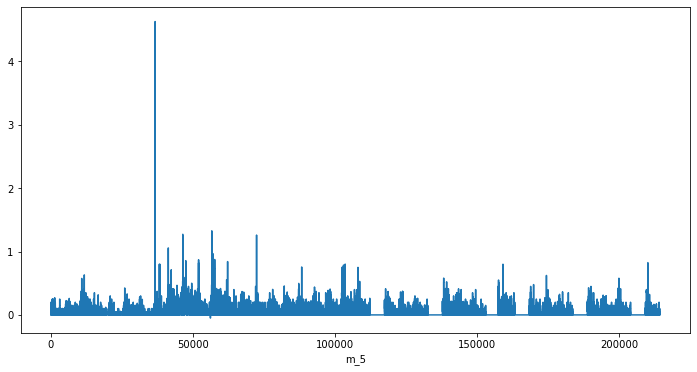

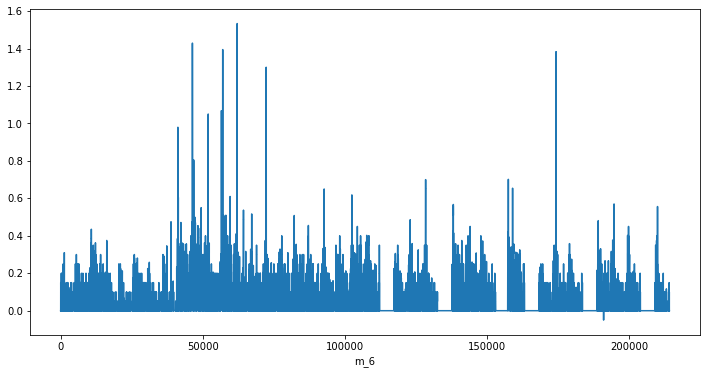

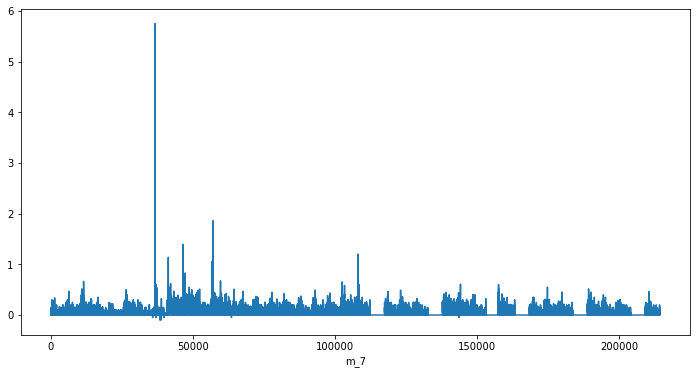

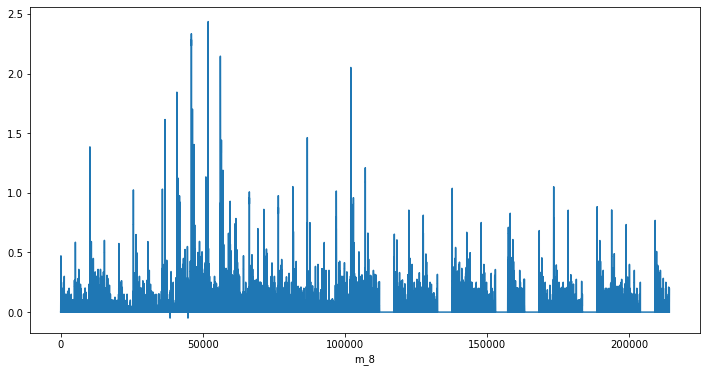

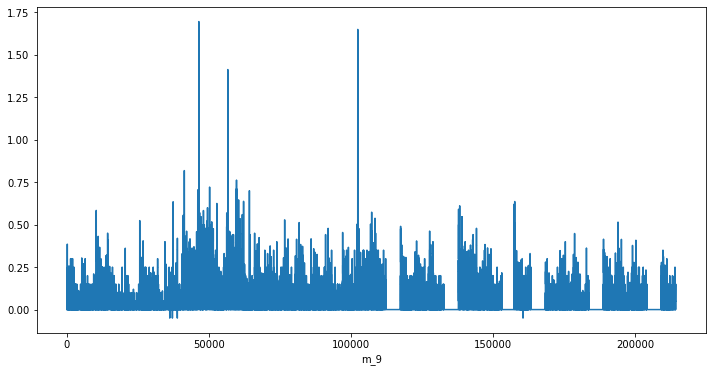

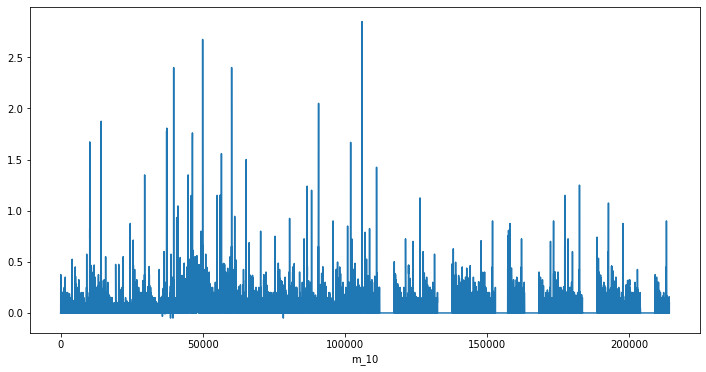

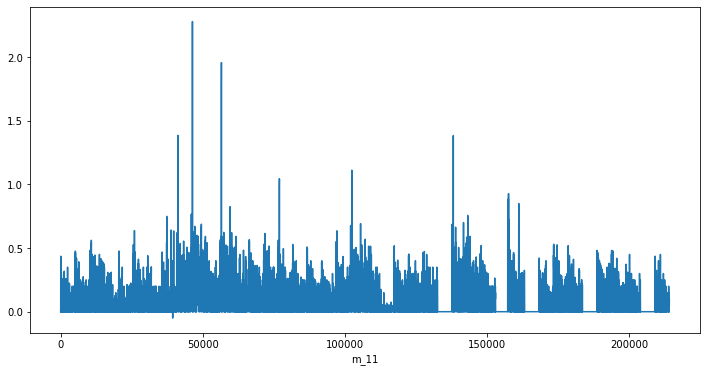

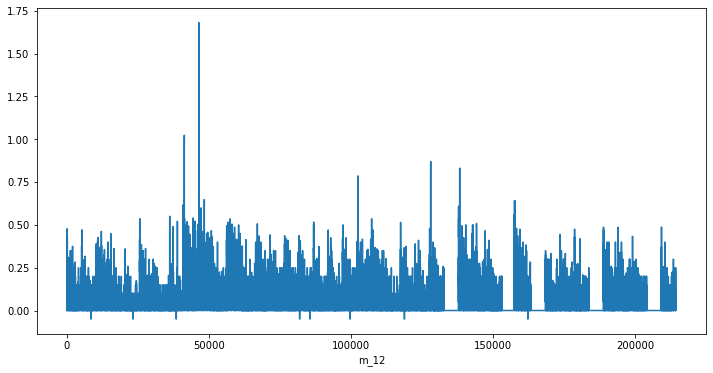

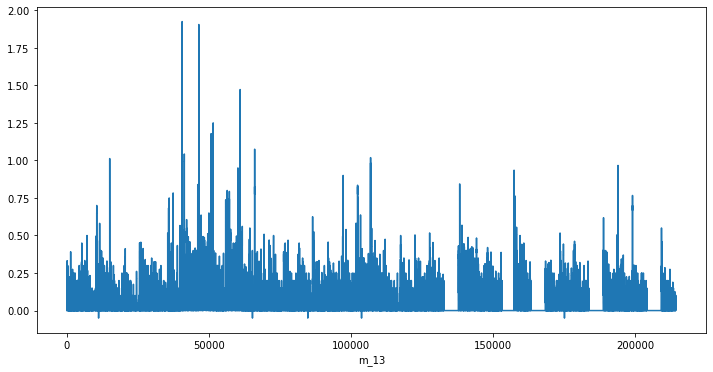

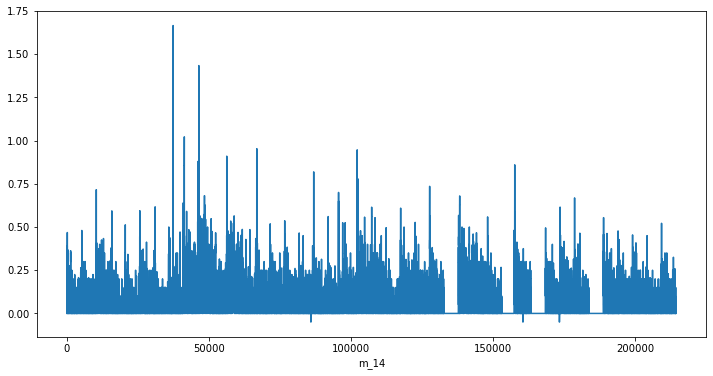

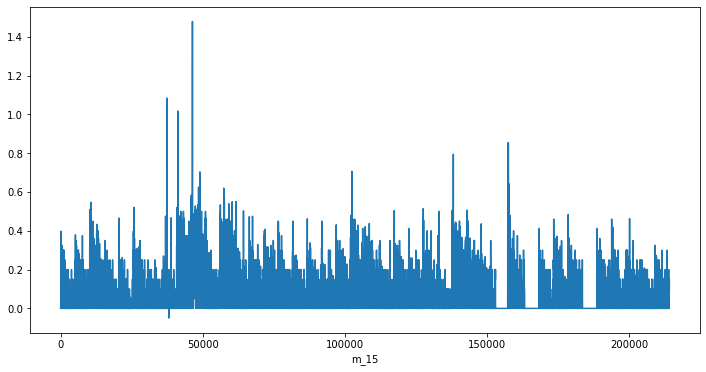

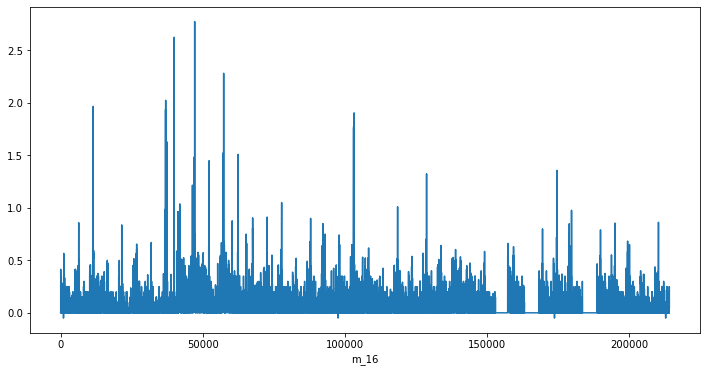

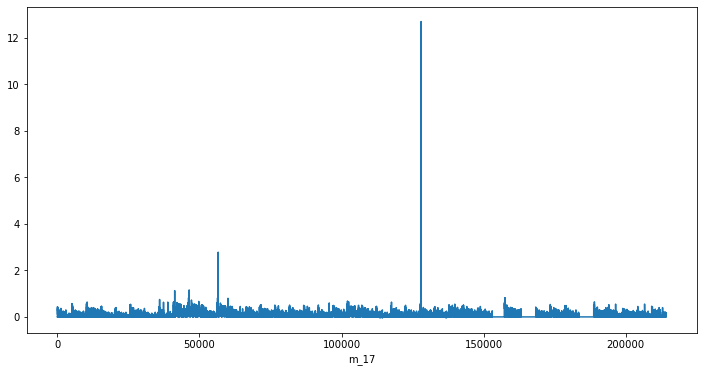

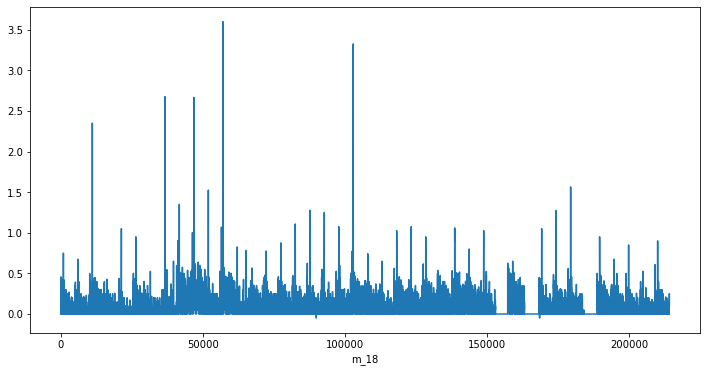

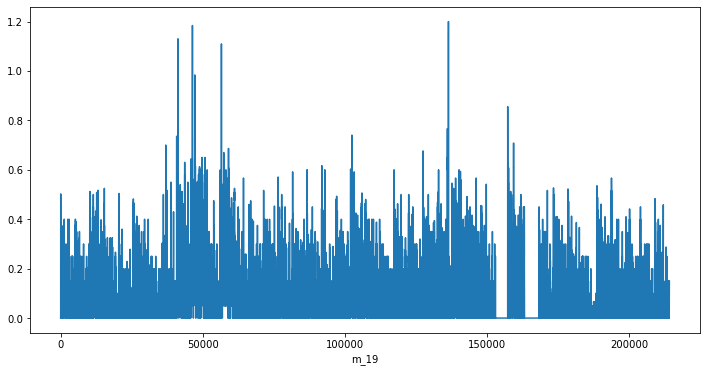

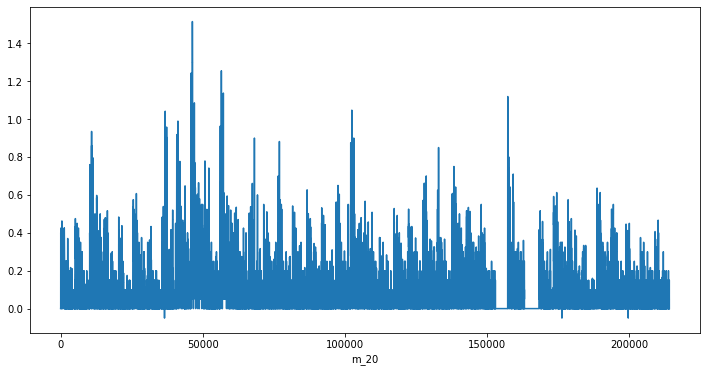

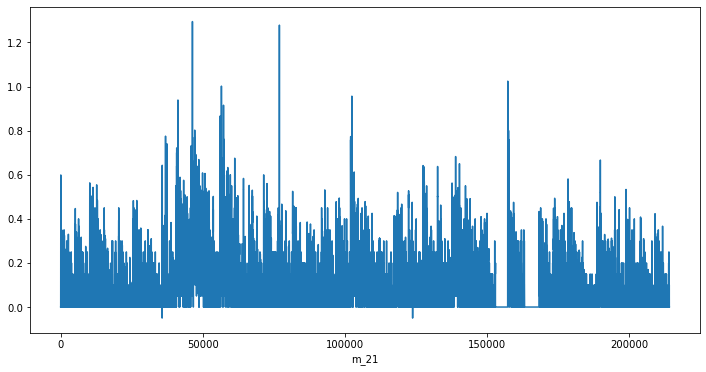

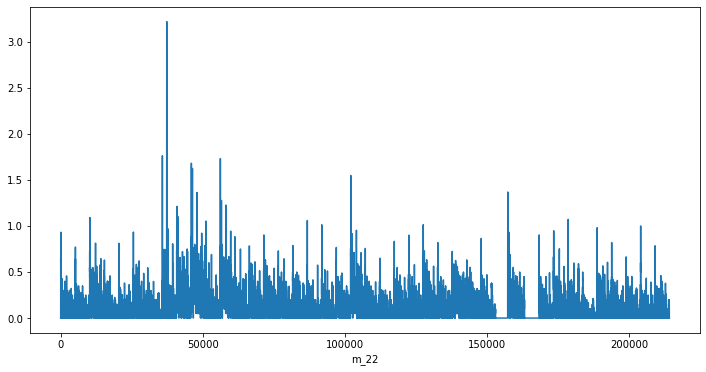

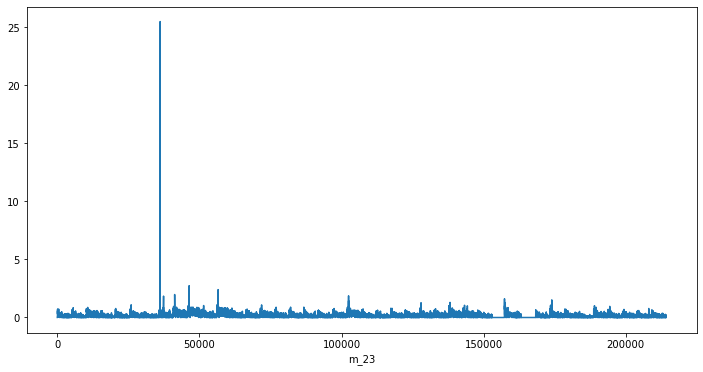

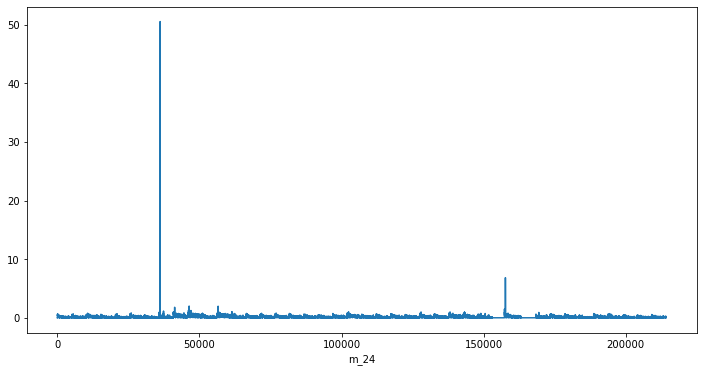

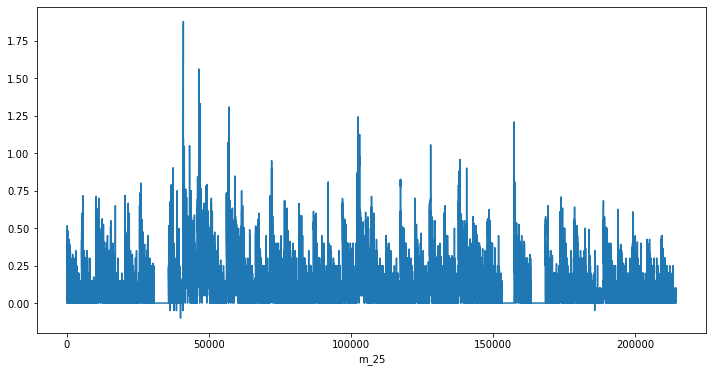

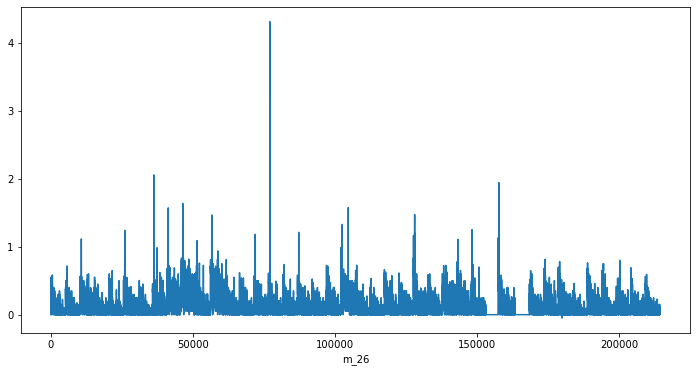

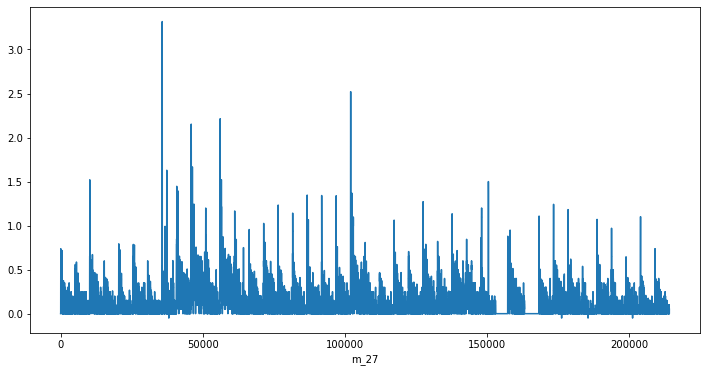

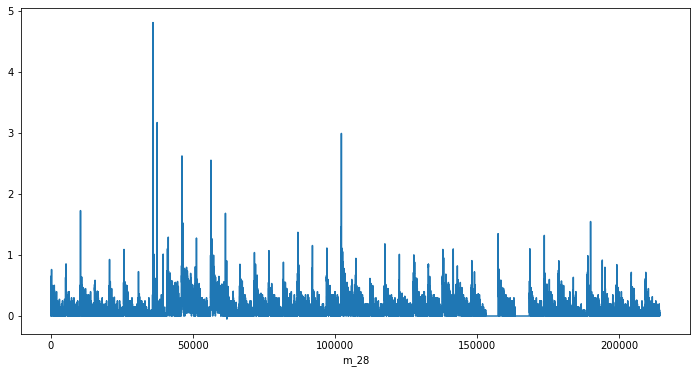

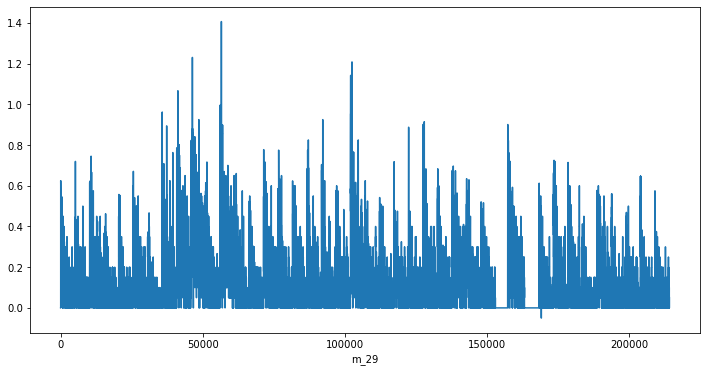

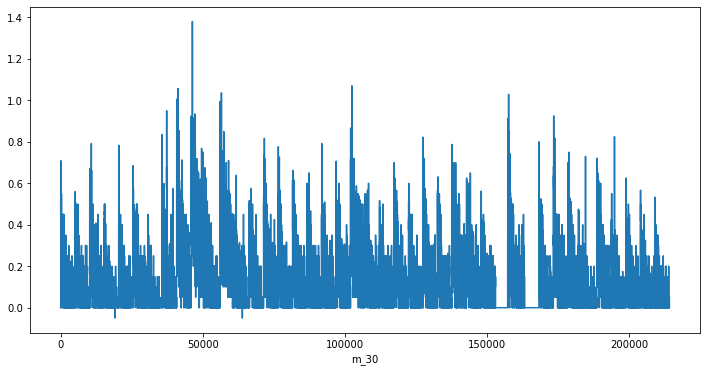

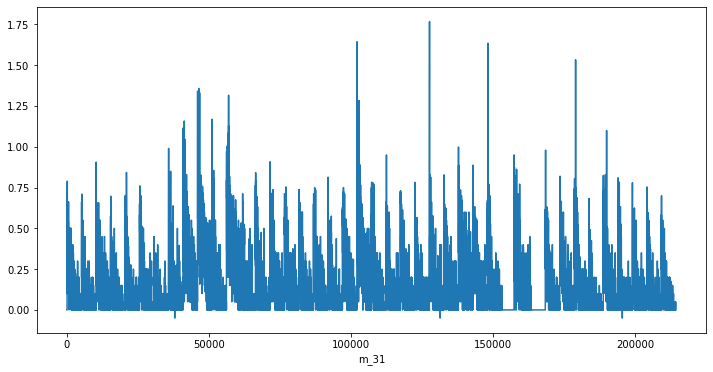

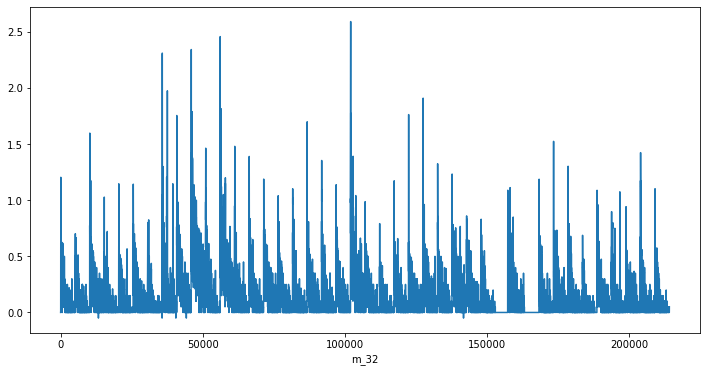

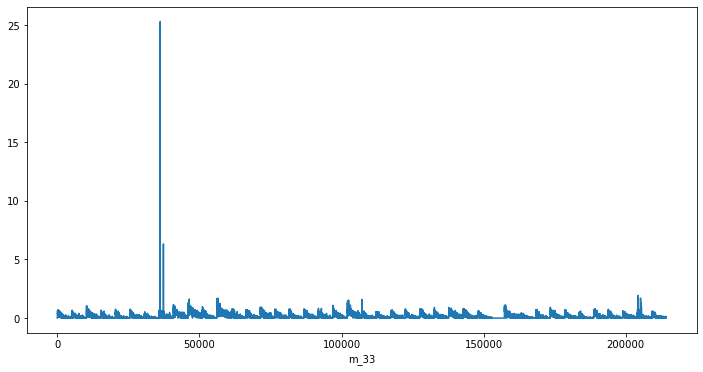

In [213]:
for i in dataset5.columns:
    plt.figure(figsize=(12,6))
#     plt.label()
    dataset5[str(i)].plot()
    plt.xlabel(str(i))
    

In [218]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

model4 = lm.predict(X_test)
model4 = pd.DataFrame(data=model4,columns=['item_cnt_month'])
model4.reset_index(inplace=True)
model4.rename(columns={"index":"ID"},inplace=True)
submission.to_csv('input/model4.csv', index=False)

# Model 6

In [223]:
sales = sales_train[(sales_train.item_price > 0) & (sales_train.item_price <= 25000)]

In [225]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


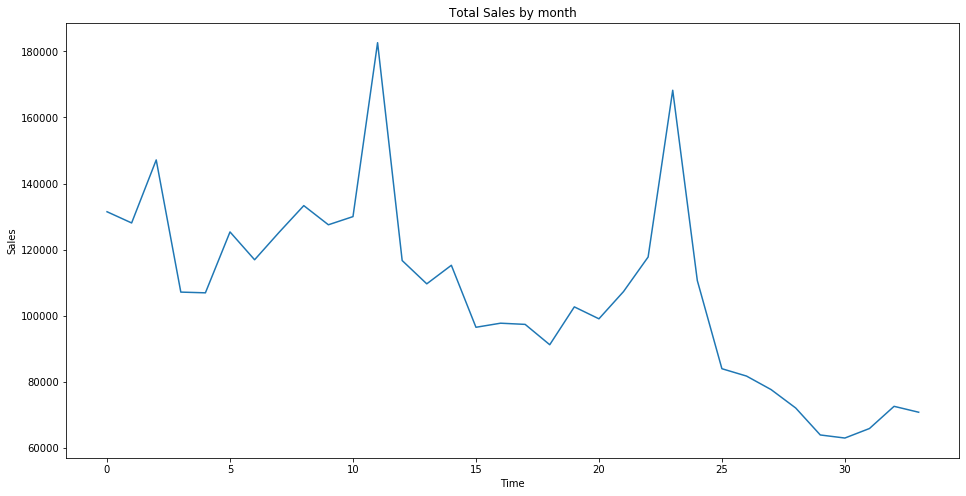

In [230]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales by month')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

In [246]:
decomp = sm.tsa.seasonal_decompose(ts.values , freq = 12 ,model = 'additive' )
fig = decomp.plot()

NameError: name 'sm' is not defined

In [232]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [233]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [239]:
# test2 = pd.merge(dataset5,test,on=['item_id'], how='inner')

In [244]:
len(test.join(dataset5, on=['shop_id']))

214200

In [245]:
pd.merge(test, dataset5, lef)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [252]:
a = pd.merge(test, sales_train, on='item_id',how='left')

MemoryError: Unable to allocate 927. MiB for an array with shape (2, 60747498) and data type float64

In [253]:
b = test.merge(sales_train, how='left', on=['item_id'])

MemoryError: Unable to allocate 22.4 MiB for an array with shape (1, 2935849) and data type datetime64[ns]

In [251]:
test

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757


# New Model

In [30]:
X_train.shape

(214200, 33)

In [31]:
X_test.shape

(214200, 33)

In [32]:
y_train.shape

(214200, 1)

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing, utils
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV

In [123]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 1  1 13 ...  1  1  1]
continuous
multiclass
multiclass


C:\Users\Decrypt\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [124]:
y_train = y_train.values.ravel()

In [125]:
X_train.shape, y_train.shape

((214200, 33), (214200,))

In [126]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

ValueError: Unknown label type: 'continuous'

In [50]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [57]:
X_train2    = np.array([ [1.2, 6.7, 2.7],  [2.3, 4.6, 2.2],  [0.3, 3.9, 0.8],  [2.1, 1.3, 4.3]  ])
y_train2  = np.array( [1.4, 9.2, 2.5, 2.2] )
X_test2  = np.array([ [1.5, 3.4, 2.2],  [7.6, 7.2, 0.2] ])

In [58]:
X_train2.shape,y_train2.shape, X_test2.shape

((4, 3), (4,), (2, 3))

In [60]:
X_train2

array([[1.2, 6.7, 2.7],
       [2.3, 4.6, 2.2],
       [0.3, 3.9, 0.8],
       [2.1, 1.3, 4.3]])

In [61]:
y_train2

array([1.4, 9.2, 2.5, 2.2])

In [62]:
y_train

array([0., 0., 1., ..., 0., 0., 0.])

In [59]:
clf = LogisticRegression()
clf.fit(X_train2, y_train2)

ValueError: Unknown label type: 'continuous'

In [55]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(training_scores_Y))
print(utils.multiclass.type_of_target(training_scores_Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))


[0 3 2 1]
continuous
multiclass
multiclass


In [56]:
clf = LogisticRegression()
clf.fit(training_data_X, training_scores_encoded)
print("LogisticRegression")
print(clf.predict(prediction_data_test))

LogisticRegression
[3 3]
